# Kuala Lumpur Weather Prediction using FB Prophet and 10 Years Historical Data

## Install and Import Dependencies

In [28]:
import pandas as pd
import numpy as np
import chart_studio.plotly as plotly
import plotly.figure_factory as ff
from plotly import graph_objs as go
from matplotlib import pyplot as plt
import seaborn as sns
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import pystan
import pickle

In [9]:
#ensure that it's 2.19.1.1
pystan.__version__

'2.19.1.1'

## Read in Data and Process Dates

In [32]:
old_df = pd.read_csv('Kuala+Lumpur.csv')
old_df.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2012-03-08,32,22,0.0,8.8,6,98,07:20 PM,06:54 AM,07:22 AM,...,7,44,80,4.1,1006,32,10,192,5,Kuala+Lumpur
1,2012-03-09,33,22,0.0,11.6,6,91,08:14 PM,07:45 AM,07:22 AM,...,8,45,75,4.1,1006,33,9,272,6,Kuala+Lumpur
2,2012-03-10,32,22,0.0,10.2,6,84,09:10 PM,08:36 AM,07:21 AM,...,6,59,81,6.3,1007,32,9,270,4,Kuala+Lumpur
3,2012-03-11,31,23,0.0,6.0,6,77,10:07 PM,09:31 AM,07:21 AM,...,7,61,86,8.3,1008,31,8,97,4,Kuala+Lumpur
4,2012-03-12,26,22,0.0,7.4,5,71,11:06 PM,10:27 AM,07:21 AM,...,9,74,94,5.0,1010,26,6,45,6,Kuala+Lumpur


In [33]:
old_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          3653 non-null   object 
 1   maxtempC           3653 non-null   int64  
 2   mintempC           3653 non-null   int64  
 3   totalSnow_cm       3653 non-null   float64
 4   sunHour            3653 non-null   float64
 5   uvIndex            3653 non-null   int64  
 6   moon_illumination  3653 non-null   int64  
 7   moonrise           3653 non-null   object 
 8   moonset            3653 non-null   object 
 9   sunrise            3653 non-null   object 
 10  sunset             3653 non-null   object 
 11  DewPointC          3653 non-null   int64  
 12  FeelsLikeC         3653 non-null   int64  
 13  HeatIndexC         3653 non-null   int64  
 14  WindChillC         3653 non-null   int64  
 15  WindGustKmph       3653 non-null   int64  
 16  cloudcover         3653 

In [34]:
# Handle Missing Values
old_df.isnull().sum()*100/len(df)

date_time            0.0
maxtempC             0.0
mintempC             0.0
totalSnow_cm         0.0
sunHour              0.0
uvIndex              0.0
moon_illumination    0.0
moonrise             0.0
moonset              0.0
sunrise              0.0
sunset               0.0
DewPointC            0.0
FeelsLikeC           0.0
HeatIndexC           0.0
WindChillC           0.0
WindGustKmph         0.0
cloudcover           0.0
humidity             0.0
precipMM             0.0
pressure             0.0
tempC                0.0
visibility           0.0
winddirDegree        0.0
windspeedKmph        0.0
location             0.0
dtype: float64

In [35]:
df = old_df.drop(['totalSnow_cm'], axis = 1)

In [36]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 18
Discrete feature Count 13
Continuous feature Count 5
Categorical feature Count 6


In [37]:
print(numerical_feature)

['maxtempC', 'mintempC', 'sunHour', 'uvIndex', 'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph']


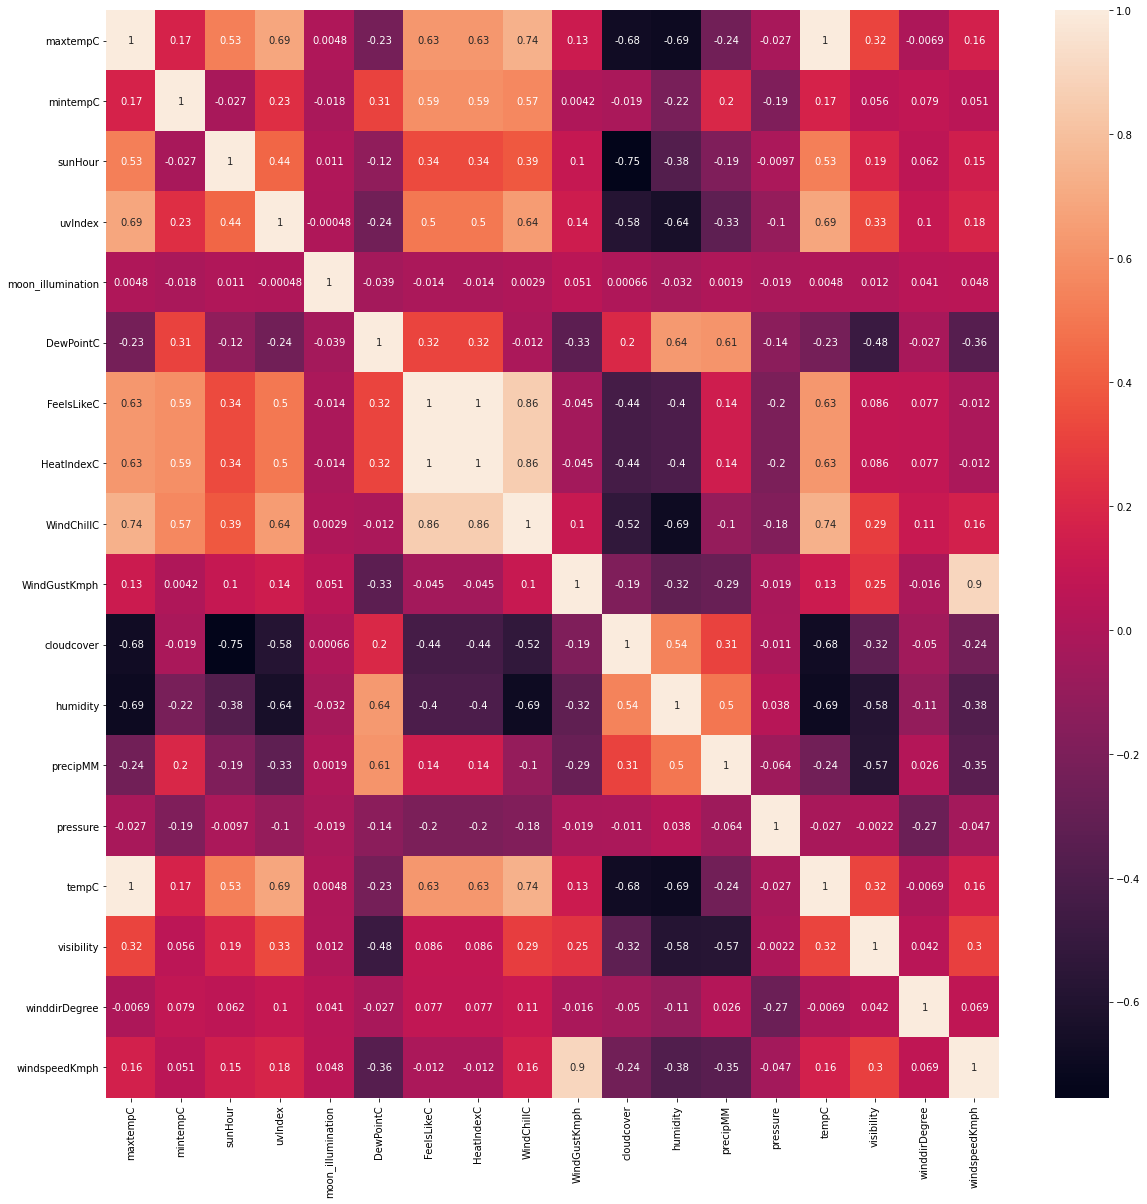

In [38]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

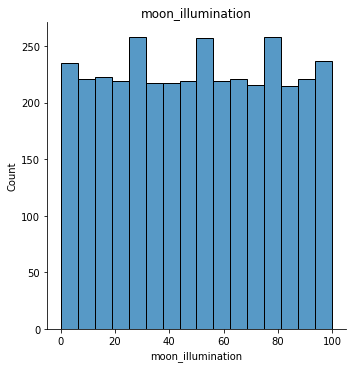

<Figure size 1080x1080 with 0 Axes>

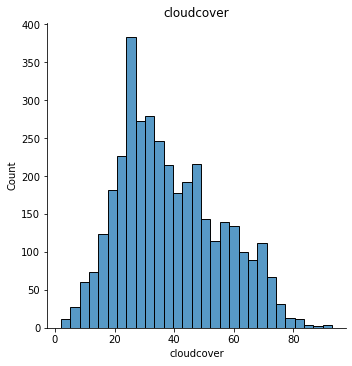

<Figure size 1080x1080 with 0 Axes>

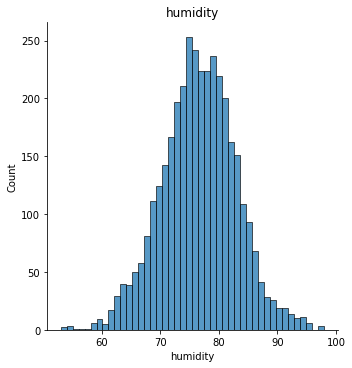

<Figure size 1080x1080 with 0 Axes>

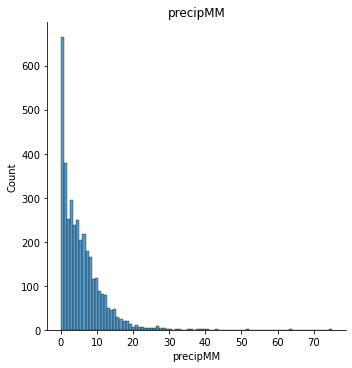

<Figure size 1080x1080 with 0 Axes>

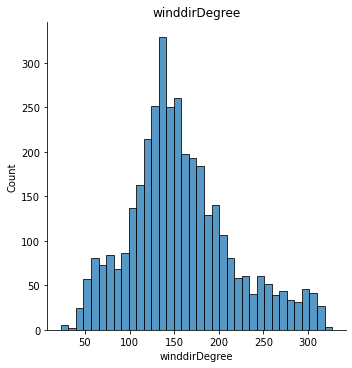

<Figure size 1080x1080 with 0 Axes>

In [43]:
for feature in continuous_feature:
    data=df.copy()
    sns.displot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarn

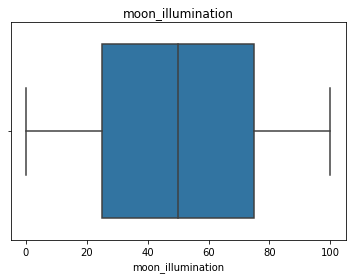

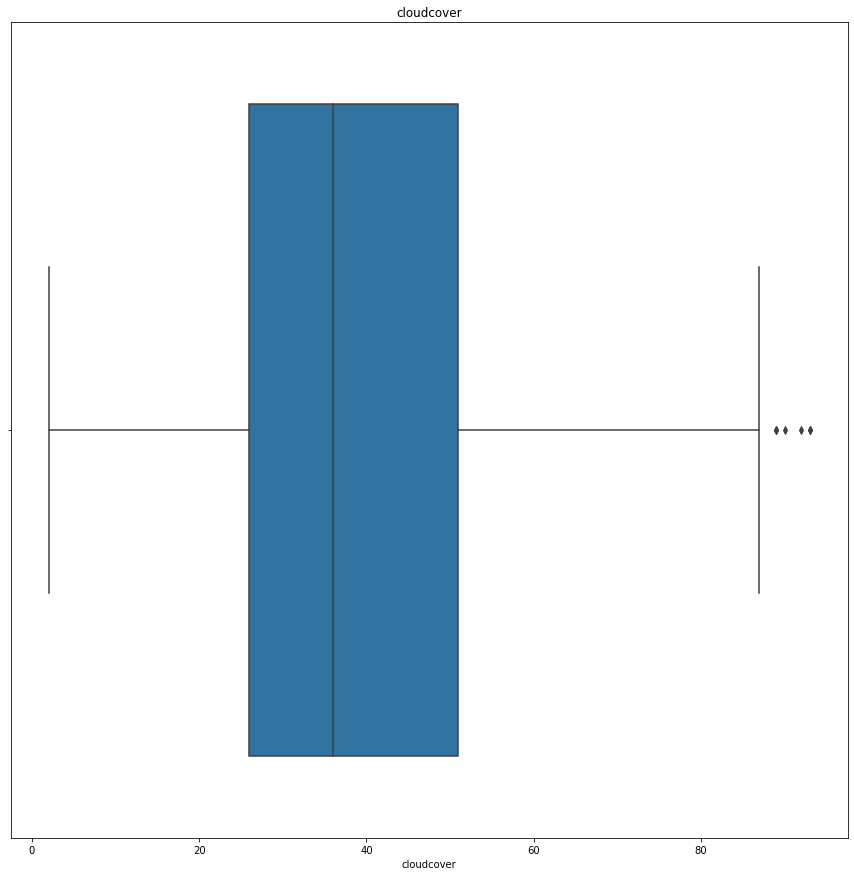

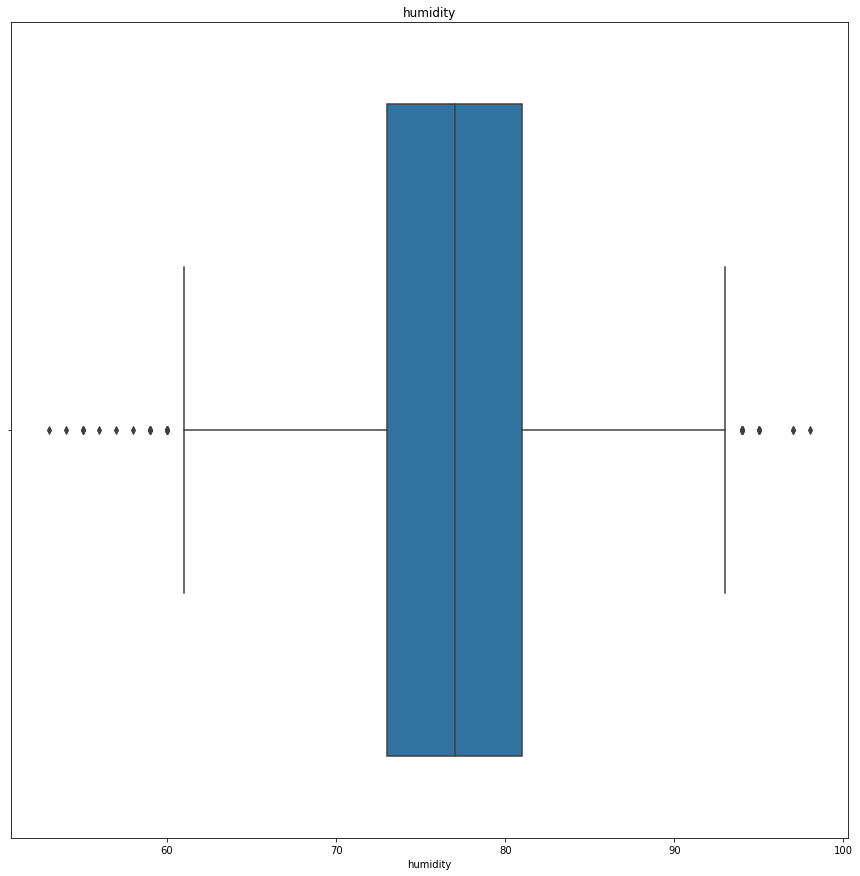

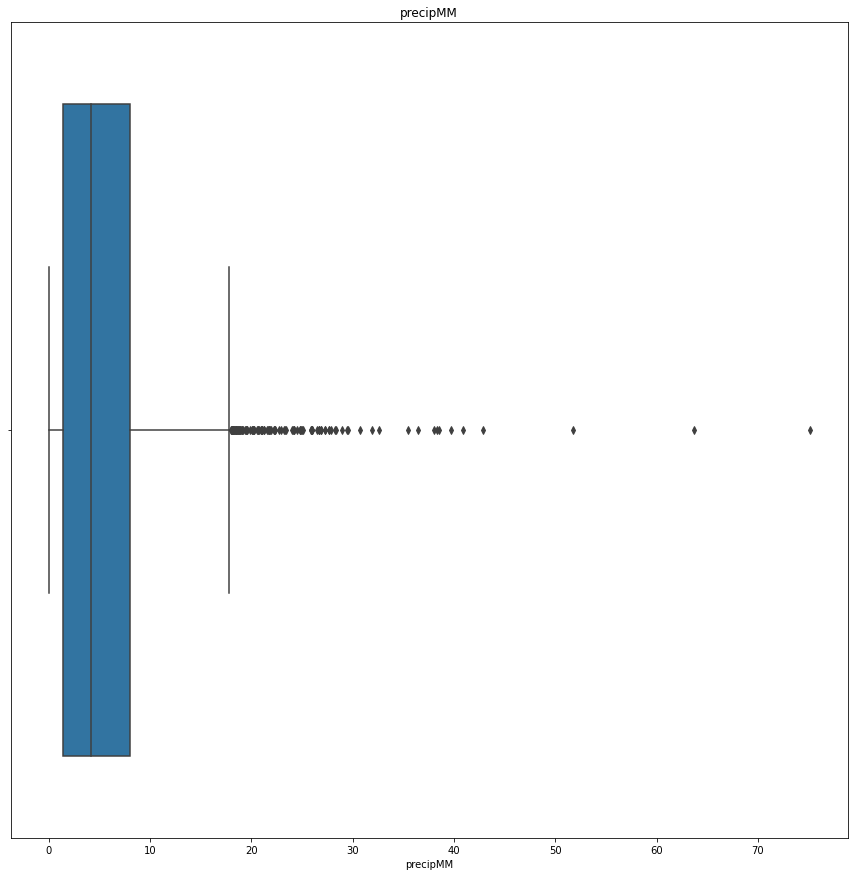

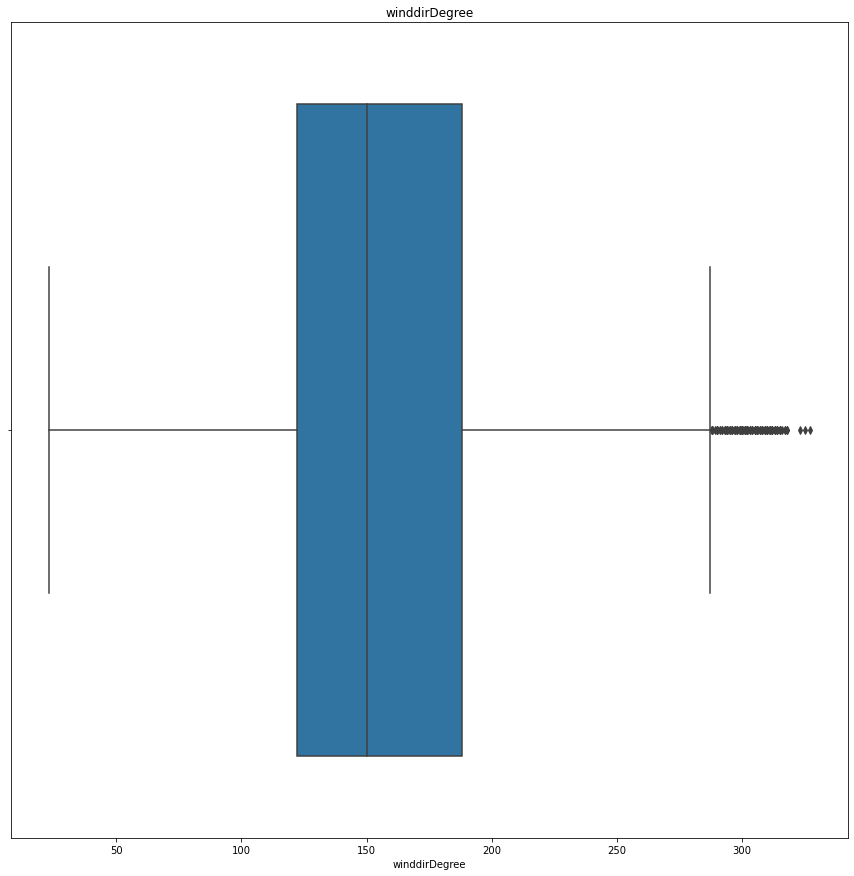

<Figure size 1080x1080 with 0 Axes>

In [44]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

## Looking at temperature data for the past 10 years

#### Preparing the max temperature (maxtempC) vs time (date_time) dataset

In [222]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.date_time, y=df['maxtempC'], name='Max Temperature',line_color='green'))
fig.layout.update(title_text='Time Series data with Rangeslider',xaxis_rangeslider_visible=True)

In [224]:
fig.show(renderer="browser")

In [225]:
X = df[['date_time', 'maxtempC']]
y = df.iloc[:,1]

In [226]:
train_df = pd.DataFrame()
train_df['ds'] = pd.to_datetime(X['date_time'])
train_df['y']=y

In [116]:
train_df.head(10)

,ds,y
0,2012-03-08,32
1,2012-03-09,33
2,2012-03-10,32
3,2012-03-11,31
4,2012-03-12,26
5,2012-03-13,32
6,2012-03-14,34
7,2012-03-15,33
8,2012-03-16,36
9,2012-03-17,33


#### Training the model

In [227]:
model = Prophet()
model.fit(train_df)
future_temp = model.make_future_dataframe(periods=365)
future_temp.tail(2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
4016,2023-03-07
4017,2023-03-08


#### Saving and loading the model for future use

In [228]:
with open('saved_model_temp.pkl', "wb") as f:
    pickle.dump(model, f)

In [229]:
with open('saved_model_temp.pkl', "rb") as f:
    m_temp = pickle.load(f)

#### Rendering and viewing the forecast

In [231]:
forecast_temp = m_temp.predict(future_temp)
fig_temp = plot_plotly(m_temp, forecast_temp)

In [232]:
fig_temp.show(renderer="browser")

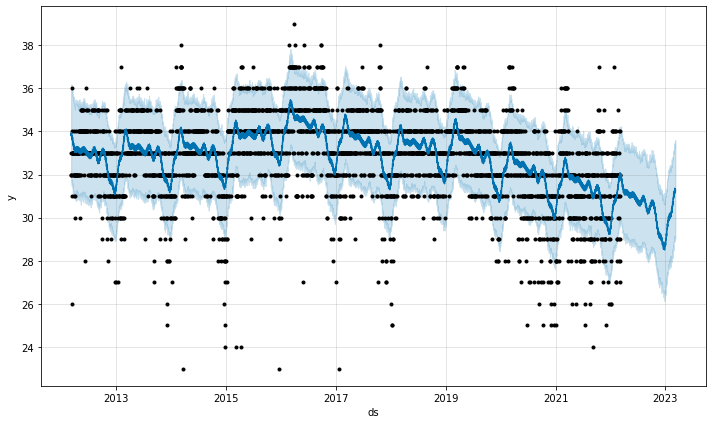

In [233]:
plot_temp = m_temp.plot(forecast_temp)

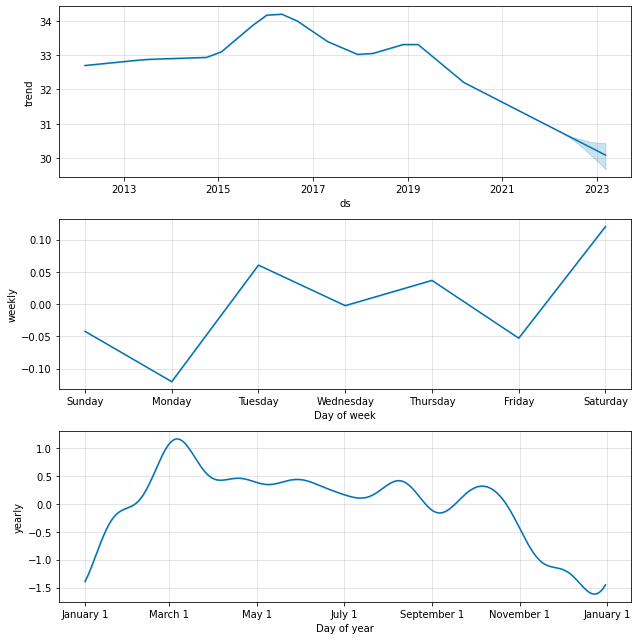

In [234]:
#plot component wise forecast
fig2_temp = m_temp.plot_components(forecast_temp)

## Looking at precipitation data over the 10 years

#### Preparing the precipitation (precipMM) vs time (date_time) dataset

In [236]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.date_time, y=df['precipMM'], name='Precipitation in MM',line_color='green'))
fig.layout.update(title_text='Time Series data with Rangeslider',xaxis_rangeslider_visible=True)

Layout({
    'template': '...', 'title': {'text': 'Time Series data with Rangeslider'}, 'xaxis': {'rangeslider': {'visible': True}}
})

In [237]:
fig.show(renderer="browser")

In [238]:
X1 = df[['date_time', 'precipMM']]
y1 = df.iloc[:,17]

In [239]:
train_df1 = pd.DataFrame()
train_df1['ds'] = pd.to_datetime(X1['date_time'])
train_df1['y']=y1

In [188]:
train_df1.head(10)

,ds,y
0,2012-03-08,4.1
1,2012-03-09,4.1
2,2012-03-10,6.3
3,2012-03-11,8.3
4,2012-03-12,5.0
5,2012-03-13,1.1
6,2012-03-14,2.1
7,2012-03-15,4.2
8,2012-03-16,3.9
9,2012-03-17,6.7


#### Training the model

In [240]:
model = Prophet()
model.fit(train_df1)
future_prec = model.make_future_dataframe(periods=365)
future_prec.tail(2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
4016,2023-03-07
4017,2023-03-08


In [241]:
with open('saved_model_prec.pkl', "wb") as f:
    pickle.dump(model, f)

In [242]:
with open('saved_model_prec.pkl', "rb") as f:
    m_prec = pickle.load(f)

#### Rendering and viewing the forecast

In [243]:
forecast_prec = m_prec.predict(future_prec)
fig_prec = plot_plotly(m_prec, forecast_prec)

In [247]:
fig_prec.show(renderer="browser")

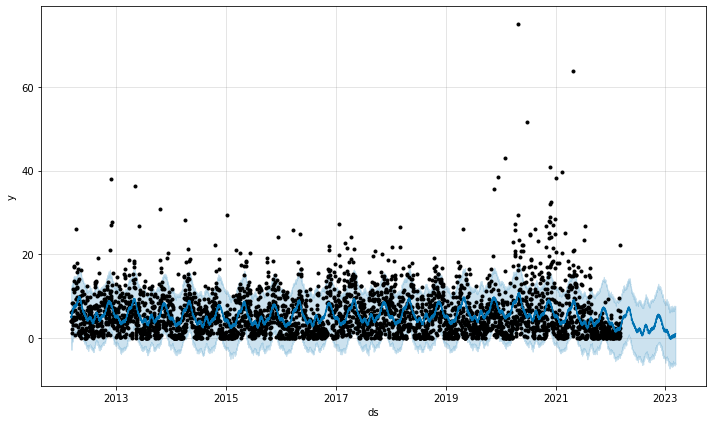

In [246]:
plot_prec = m_prec.plot(forecast_prec)

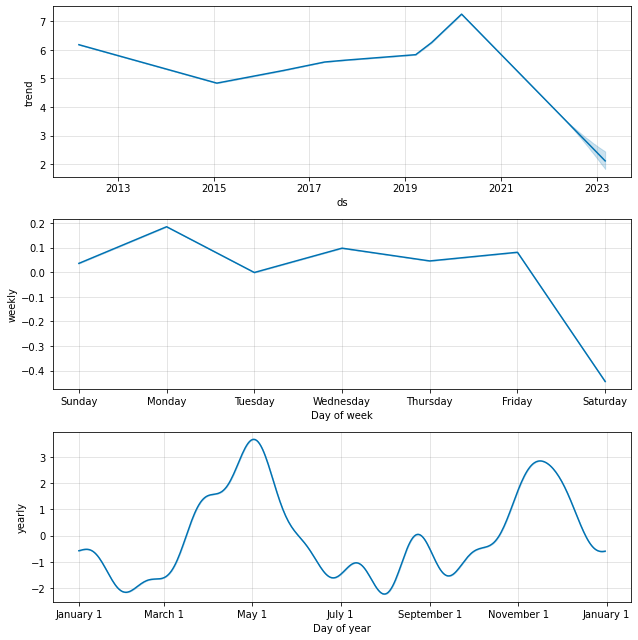

In [245]:
#plot component wise forecast
fig2_prec = m_prec.plot_components(forecast_prec)

In [5]:
pip install meteogram-py

  Using cached meteogram-py-0.0.1.tar.gz (3.0 kB)
  Created wheel for meteogram-py: filename=meteogram_py-0.0.1-py3-none-any.whl size=3509 sha256=7b21dbea3ca7e70fcddbaf4f31ae6279115df751a4b0e3e14a47fb63465d43c3
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\41\b8\02\6a8e919e6719a91d496748af6531e68f450c8b3a3180027940
Successfully built meteogram-py
Note: you may need to restart the kernel to use updated packages.


In [11]:
from datetime import datetime, timedelta
from meteogrampy import Meteogram, SubPlot
from meteogrampy.styles import Temperature, WindSpeed, WindDirection, Freezing

SyntaxError: invalid syntax (__init__.py, line 10)

In [9]:


temperature_data = [50, 49, 18, 17, 18, 18, 19]
wind_speed_data = [10, 25, 26, 30, 25, 26, 28]
wind_direction_data = [180, 345, 355, 1, 355, 354, 356]

dates = []
date = datetime(2016, 12, 25, 12, 0)
dates.append(date)
for x in xrange(len(temperature_data) - 1):
    date = date + timedelta(seconds=3600)
    dates.append(date)


freezing_data = [32 for x in dates]

temp = Meteogram.variable(Temperature, [dates, temperature_data])
freezing = Meteogram.variable(Freezing, [dates, freezing_data])
wind_speed = Meteogram.variable(WindSpeed, [dates, wind_speed_data])
wind_direction = Meteogram.variable(WindDirection, [dates, wind_direction_data])


temp_plot = SubPlot(left_vars=(temp, freezing))


wind_plot = SubPlot(left_vars=wind_speed, right_var=wind_direction)
wind_plot.right_ylim = (0, 360)

meteogram = Meteogram((wind_plot, temp_plot))
meteogram.title = "Sweet data bro!"
meteogram.show()

SyntaxError: invalid syntax (__init__.py, line 10)